In [1]:
import pandas as pd

In [2]:
def group_by_plot(dataset, by, ascending=None, head=None, kind="bar", figsize=(20,5), title=None, *args, **kwargs):
    tmp = dataset.groupby(by=by).size()
    if ascending is not None:
        tmp = tmp.sort_values(ascending=ascending)
    return tmp.head(head).plot(kind=kind, figsize=figsize, title=title, *args, **kwargs)

# Peace agreement dataset

In [3]:
agreements = pd.read_excel("pax_all_agreements_data.xlsx")

In [4]:
agreements.shape

(1868, 266)

In [5]:
agreements.dtypes

Con       object
Contp     object
PP         int64
PPName    object
Reg       object
           ...  
ImOth      int64
ImRef      int64
ImPK       int64
ImE        int64
ImSrc      int64
Length: 266, dtype: object

## Con: Country/Entity
The country or jurisdiction in which the conflict originated; where the conflict has a territorial element, the entity to which the conflict relates. This is the case for both intrastate agreements in intrastate conflict and for interstate agreements in intrastate conflicts, i.e. 'pure' interstate agreements signed as a result of intrastate negotiations in a conflict.

<AxesSubplot:title={'center':'30 països amb més casos'}, xlabel='Con'>

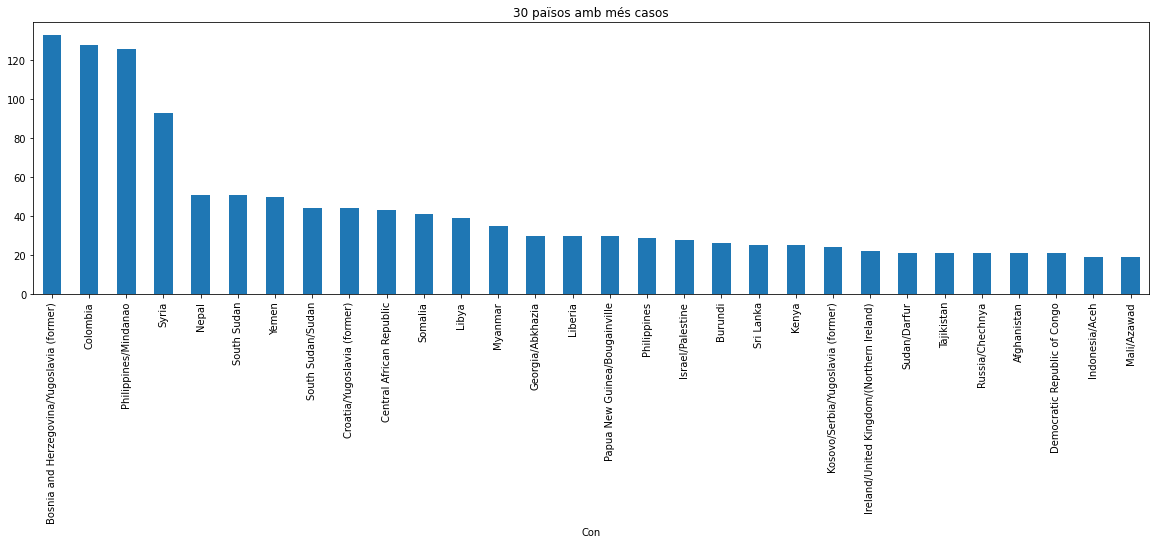

In [8]:
group_by_plot(agreements, "Con", title="30 països amb més casos", head=30, ascending=False)

## Contp: Conflict type
Type of conflict the agreement is addressing
* ‘Government’ refers to ideological or political disputes, and ‘Territory’ to purely territorial disputes.
* All intrastate disputes over territory are coded ‘Government/territory’, as they involve an incompatibility over the territory and over the government and are sometimes resolving by dealing with just one of these issues.
* Agreements are coded as ‘territorial’ even beyond secessionist conflicts, where claims contest or are related to governance of specific regions, even if secessionist or irredentist claims are not made.
* Inter-group conflicts are between non-state groups; the agreements pertaining often deal with provisional revolutionary interim governments, e.g. in cases when a government is defeated militarily and the non-state groups ‘divide the spoils’.

<AxesSubplot:title={'center':'Conflict types'}, ylabel='None'>

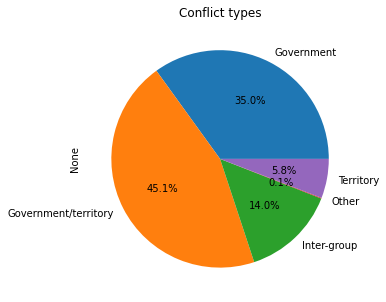

In [9]:
group_by_plot(agreements, "Contp", kind="pie", autopct='%1.1f%%', title="Conflict types")

## PPName: Peace process Name

<AxesSubplot:title={'center':'The 30 peace processes with more peace agreements'}, xlabel='PPName'>

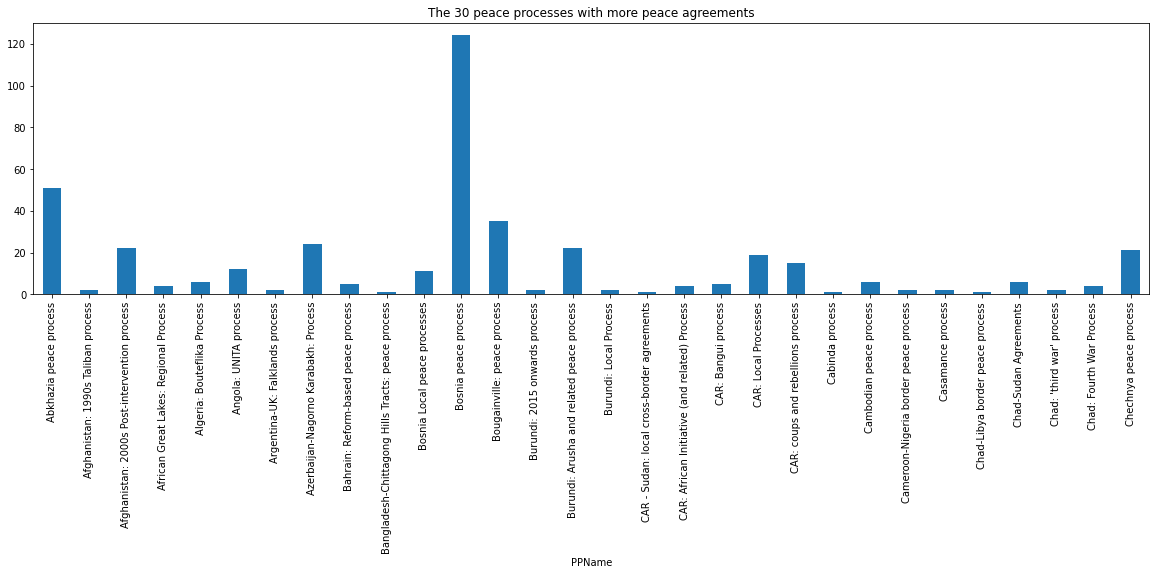

In [10]:
group_by_plot(agreements, "PPName", head=30, title="The 30 peace processes with more peace agreements")

## PP: Peace Process Number
The number code for the peace process

## Reg: Region
Region in which the conflict addressed by the agreement is taking place.

<AxesSubplot:title={'center':'Regions by number of peace agreements'}, ylabel='None'>

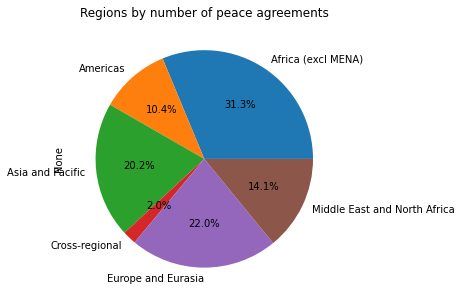

In [11]:
group_by_plot(agreements, "Reg", kind="pie", autopct='%1.1f%%', title="Regions by number of peace agreements")

## AgtId: Agreement ID
Unique identifying number for each of the agreements.

## Agt: Agreement Name

The name of the agreement as found in the text of the agreement. Where appropriate, popular names of the agreements are included in parenthesis.

## Dat: Date Signed
The date on which the agreement was signed or agreed.

In [12]:
agreements.Dat = pd.to_datetime(agreements.Dat)

<AxesSubplot:title={'center':'Number of agreements per year'}, xlabel='Dat'>

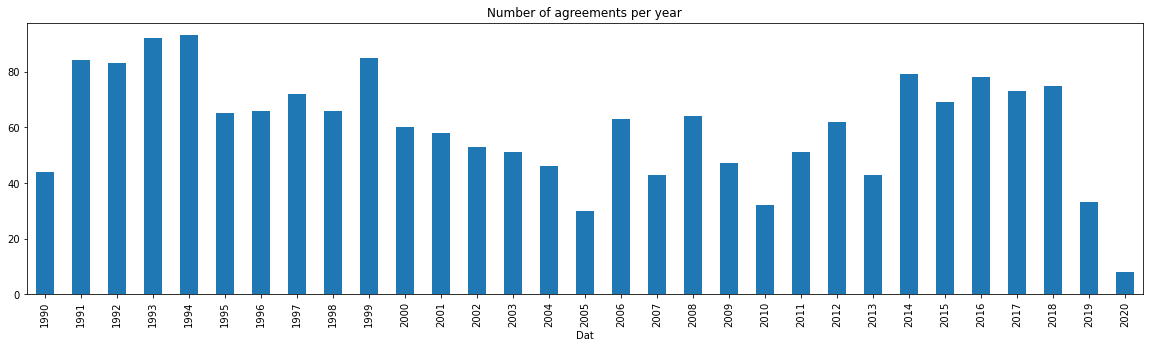

In [13]:
group_by_plot(agreements, agreements.Dat.dt.to_period("Y"), title="Number of agreements per year")

In [14]:
agreements.groupby(by=agreements.Dat.dt.to_period("Y")).size().mean()

60.25806451612903

In [15]:
agreements.groupby(by=agreements.Dat.dt.to_period("Y")).size().min()

8

In [16]:
agreements.groupby(by=agreements.Dat.dt.to_period("Y")).size().max()

93

## Status: Agreement Definition and Status

<AxesSubplot:ylabel='None'>

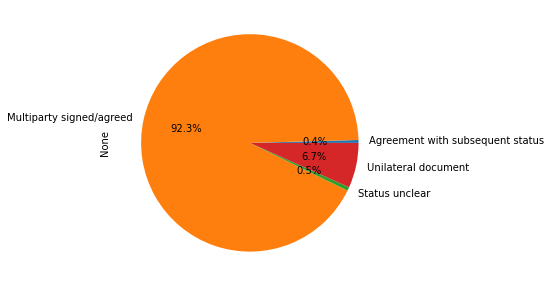

In [17]:
group_by_plot(agreements, "Status", kind="pie", autopct='%1.1f%%')

## Lgt: Agreement length (pages)
Agreement length, in pages. This is taken from the agreement pdf, and includes any title pages, empty pages, pages with photos, and similar.

<AxesSubplot:>

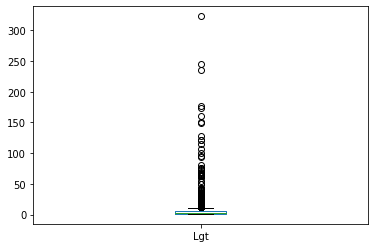

In [18]:
agreements.Lgt.plot(kind="box")

## N_characters: Agreement length (characters)

Agreement length, by number of characters in agreement text.

<AxesSubplot:>

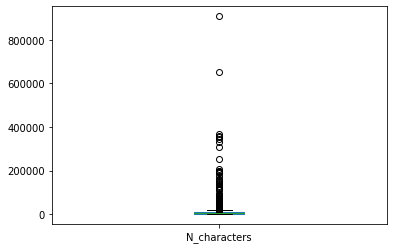

In [19]:
agreements.N_characters.plot(kind="box")

## Agtp: Agreement/conflict type.
This is a character variable, describing the primary nature of the agreement and conflict.

<AxesSubplot:title={'center':'Agreement/Conflict type'}, ylabel='None'>

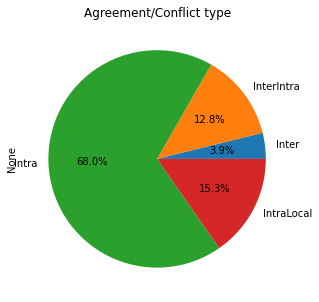

In [20]:
group_by_plot(agreements, "Agtp", kind="pie", autopct='%1.1f%%', title="Agreement/Conflict type")

## Stage: Agreement stage
This is a character variable that provides information on the stage of the peace process that the agreement is signed in. We have identified seven main stages of the process that agreements may be part of: pre-negotiation/process; substantive-comprehensive; substantive-partial; implementation/renegotiation; renewal; ceasefire/related; other.
* Pre: Pre-negotiation/process.
* SubPar: Framework-substantive, Partial.
* SubComp: Framework-substantive, Comprehensive.
* Imp: Implementation/renegotiation.
* Ren: Renewal.
* Cea: Ceasefire/related.
* Other: This is a residual category, capturing all agreements that do not fit the remaining definition.

<AxesSubplot:title={'center':'Agreement/Conflict type'}, ylabel='None'>

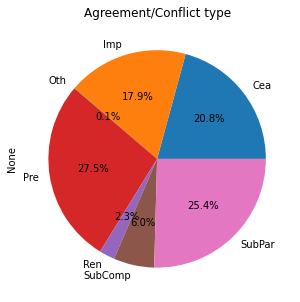

In [21]:
group_by_plot(agreements, "Stage", kind="pie", autopct='%1.1f%%', title="Agreement/Conflict type")

## StageSub: subcoding of stage

Each of the categories in the previous variable is split into subcategories. This means that the subcategories are category-specific. Only agreements in, for example, ceasefire category can be classified into a ceasefire subcategory.

## Part: Parties

The parties who directly sign the agreement, often the parties to the conflict and their regional allies.

## OthAgr: Other Agreement

Names of any other agreements that the document in question mentions, as found in the text.

# Data preparation for topics

In [23]:
general_cols = ["Con", "Contp", "PPName", "Reg", "AgtId", "Agt", "Dat", "Status", "Agtp", "Stage", "LocISO"]

In [24]:
talk = {
    "Groups": [
        {"col": "GCh", "name": "Children/Youth"}, 
        {"col": "GDis", "name": "Disabled persons"},
        {"col": "GAge", "name": "Elderly/Age"},
        {"col": "GMig", "name": "Migrant workers"},
        {"col": "GRa", "name": "Racial/ethnic/national groups"},
        {"col": "GRe", "name": "Religious groups"},
        {"col": "GInd", "name": "Indigenous people"},
        {"col": "GOth", "name": "Other groups"},
        {"col": "GRef", "name": "Refugees/ displaced persons"},
        {"col": "GSoc", "name": "Social Class"}
    ],
    "Gender": [
        {"col": "GeWom", "name": "Women, girls and gender"},
        {"col": "GeMe", "name": "Men and Boys"},
        {"col": "GeLgbti", "name": "LGBTI references"},
        {"col": "GeFa", "name": "Family"}
    ],
    "State definition": [
        {"col": "StCon", "name": "State configuration"},
        {"col": "StSd", "name": "Self determination"},
        {"col": "StRef", "name": "Referendum"},
        {"col": "StSym", "name": "State symbols"},
        {"col": "StInd", "name": "Independence/secession"},
        {"col": "StUni", "name": "Accession/unification"},
        {"col": "StBor", "name": "Border delimitation"},
        {"col": "StXbor", "name": "Cross-border provision"}
    ],
    "Governance": [
        {"col": "Pol", "name": "Political Institutions (new or reformed)"},
        {"col": "ConRen", "name": "Constitutional renewal/affirmation"},
        {"col": "Cons", "name": "Constitutional reform/making"},
        {"col": "Ele", "name": "Elections"},
        {"col": "ElecComm", "name": "Electoral Commission"},
        {"col": "PolPar", "name": "Political parties reform"},
        {"col": "Civso", "name": "Civil Society"},
        {"col": "Tral", "name": "Traditional/Religious Leaders"},
        {"col": "Pubad", "name": "Public Administration (Civil Service)"}
    ],
    "Powersharing": [
        {"col": "Polps", "name": "Political Powersharing"},
        {"col": "Terps", "name": "Territorial powersharing"},
        {"col": "Eps", "name": "Economic powersharing"},
        {"col": "Mps", "name": "Military powersharing"}
    ],
    "Human rights and equality": [
        {"col": "HrGen", "name": "Human Rights/ Rule of Law"},
        {"col": "EqGen", "name": "Equality"},
        {"col": "HrDem", "name": "Democracy"},
        {"col": "Prot", "name": "Protection measures"},
        {"col": "HrFra", "name": "Human Rights Framework"},
        {"col": "HrCp", "name": "Civil and political rights"},
        {"col": "HrSec", "name": "Socio-economic rights"},
        {"col": "HrNi", "name": "NHRI (National Human Rights Institution)"},
        {"col": "HrIi", "name": "Regional or international human rights institutions"},
        {"col": "HrMob", "name": "Mobility/Access"},
        {"col": "HrDet", "name": "Detention Procedures"},
        {"col": "Med", "name": "Media and communication"},
        {"col": "HrCit", "name": "Citizenship"}
    ],
    "Justice SSector Reform": [
        {"col": "JusCr", "name": "Criminal Justice and Emergency law"},
        {"col": "JusEm", "name": "State of Emergency Provisions"},
        {"col": "JusJu", "name": "Judiciary and courts"},
        {"col": "JusPri", "name": "Prisons and detention"},
        {"col": "JusTra", "name": "Traditional/ Religious Laws"}
    ],
    "Socio-Economic Reconstruction": [
        {"col": "Dev", "name": "Development or socio-economic reconstruction"},
        {"col": "NEC", "name": "National economic plan"},
        {"col": "NatRes", "name": "Natural resources"},
        {"col": "IntFu", "name": "International funds"},
        {"col": "Bus", "name": "Business"},
        {"col": "Tax", "name": "Taxation"},
        {"col": "Ban", "name": "Banks"}
    ],
    "Land, property, and environment": [
        {"col": "LaRef", "name": "Land reform/rights"},
        {"col": "LaNom", "name": "Pastoralist/nomadism rights"},
        {"col": "LaCH", "name": "Cultural heritage"},
        {"col": "LaEn", "name": "Environment"},
        {"col": "Wat", "name": "Water or riparian (river) rights/access"}
    ],
    "Security Sector": [
        {"col": "Ce", "name": "Ceasefire"},
        {"col": "SsrPol", "name": "Police"},
        {"col": "SsrArm", "name": "Armed Forces"},
        {"col": "SsrDdr", "name": "DDR"},
        {"col": "SsrInt", "name": "Intelligence service"},
        {"col": "SsrPsf", "name": "Rebel/opposition/Para-statal forces"},
        {"col": "SsrFf", "name": "Withdrawal of foreign forces"},
        {"col": "Cor", "name": "Corruption"},
        {"col": "SsrCrOcr", "name": "Crime/Organised crime"},
        {"col": "SsrDrugs", "name": "Drugs"},
        {"col": "Terr", "name": "Terrorism"}
    ],
    "Transitional Justice": [
        {"col": "TjAm", "name": "Amnesty/pardon"},
        {"col": "TjCou", "name": "Courts"},
        {"col": "TjMech", "name": "Mechanism"},
        {"col": "TjPrire", "name": "Prisoner release"},
        {"col": "TjVet", "name": "Vetting"},
        {"col": "TjVic", "name": "Victims"},
        {"col": "TjMis", "name": "Missing"},
        {"col": "TjRep", "name": "Reparations"},
        {"col": "TjNR", "name": "Reconciliation"}
    ],
    "Implementation": [
        {"col": "ImUN", "name": "UN Signatory"},
        {"col": "ImOth", "name": "Other International Signatory"},
        {"col": "ImRef", "name": "Referendum for agreement"},
        {"col": "ImPK", "name": "International Mission/Force/Similar"},
        {"col": "ImE", "name": "Enforcement Mechanism"},
    ]
}

In [25]:
def to_binary(row, columns):
    for col in columns:
        col_name = col["col"]
        if row[col_name] != 0:
            row[col_name] = 1
    return row

def simplificate_topic(row):
    # Group goes from 0 to 3. We will transform to binary class:
    # 0 if no mention, 1 if any mention
    # (As of now no further levels will be analyzed)
    row = to_binary(row, talk["Groups"])
    # Gender is already binary
    
    # State Definition is already binary
    
    # Governance goes from 0 to 3. We will transform to binary class:
    # 0 if no mention, 1 if any mention. 
    row = to_binary(row, talk["Governance"])
    
    # Powersharing goes from 0 to 3. We will transform to binary class:
    # 0 if no mention, 1 if any mention. 
    row = to_binary(row, talk["Powersharing"])
    
    # Human rights and equality goes from 0 to 3. We will transform to binary class:
    # 0 if no mention, 1 if any mention. 
    row = to_binary(row, talk["Human rights and equality"])
    
    # Justice Sector Reform is already binary
    
    # Socio-Economic Reconstruction goes from 0 to 3. We will transform to binary class:
    # 0 if no mention, 1 if any mention. 
    row = to_binary(row, talk["Socio-Economic Reconstruction"])
    
    # Land, property, and environment is already binary
    
    # Security Sector is already binary
    
    # Transitional Justice goes from 0 to 3. We will transform to binary class:
    # 0 if no mention, 1 if any mention. 
    row = to_binary(row, talk["Transitional Justice"])

    # Implementation is already binary
    return row

def countries(row):
    cols = list(agreements_simplified.columns)
    cols += ["LocISO"]
    loc2 = None
    if pd.isna(row["Loc2ISO"]) is False:
        loc2 = row.copy()
        loc2["LocISO"] = loc2["Loc2ISO"]
    loc1 = row.copy()
    loc1["LocISO"] = loc1["Loc1ISO"]
    if loc2 is None:
        return [loc1[cols].to_list()]
    else:
        return [loc1[cols].to_list(), loc2[cols].to_list()]
def create_hierarchy(row):
    columns_name = general_cols + ["Topic", "Subtopic", "Value"]
    new_rows = []
    for key, items in talk.items():
        for item in items:
            col_name = item["col"]
            name = item["name"]
            if row[col_name] == 1:
                row["Topic"] = key
                row["Subtopic"] = name
                row["Value"] = 1
                new_rows.append(row.copy()[columns_name].to_list())
    return new_rows

In [26]:
agreements_simplified = agreements.apply(simplificate_topic, axis=1, result_type="broadcast")

In [27]:
agreements_simplified.head(2)

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,TjRep,TjRSym,TjRMa,TjNR,ImUN,ImOth,ImRef,ImPK,ImE,ImSrc
0,Afghanistan,Government/territory,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,2232,3,Resolution of Intra Afghan Peace Conference in...,2019-07-08,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,1
1,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1739,2,Agreement between the Islamic Republic of Afgh...,2016-09-22,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,1,1


In [28]:
dfs = []
for index, row in agreements_simplified.iterrows():
    dfs += countries(row)

cols = list(agreements_simplified.columns)
cols += ["LocISO"]
agreements_countries = pd.DataFrame(dfs, columns=cols)

In [29]:
agreements_countries.head(2)

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,TjRSym,TjRMa,TjNR,ImUN,ImOth,ImRef,ImPK,ImE,ImSrc,LocISO
0,Afghanistan,Government/territory,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,2232,3,Resolution of Intra Afghan Peace Conference in...,2019-07-08,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,1,AFG
1,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1739,2,Agreement between the Islamic Republic of Afgh...,2016-09-22,Multiparty signed/agreed,...,0,0,0,0,0,0,0,1,1,AFG


In [30]:
dfs = []
for index, row in agreements_countries.iterrows():
    dfs += create_hierarchy(row)
    
agreements_long = pd.DataFrame(dfs, columns=general_cols + ["Topic", "Subtopic", "Value"])

In [31]:
agreements_long.head(2)

,Con,Contp,PPName,Reg,AgtId,Agt,Dat,Status,Agtp,Stage,LocISO,Topic,Subtopic,Value
0,Afghanistan,Government/territory,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,2232,Resolution of Intra Afghan Peace Conference in...,2019-07-08,Multiparty signed/agreed,Intra,Pre,AFG,Gender,"Women, girls and gender",1
1,Afghanistan,Government/territory,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,2232,Resolution of Intra Afghan Peace Conference in...,2019-07-08,Multiparty signed/agreed,Intra,Pre,AFG,Human rights and equality,Protection measures,1


In [32]:
agreements_long.to_excel("aggrements_long_4_12_2021.xlsx", index=False)

In [33]:
def values(var):
    x = var.unique()
    print(len(x))
    print(x)

In [34]:
values(agreements.Loc1ISO)

83
['AFG' 'DZA' 'AGO' nan 'ARG' 'AZE' 'BHR' 'BGD' 'BIH' 'PNG' 'BDI' 'KHM'
 'CMR' 'CAF' 'SDN' 'TCD' 'CHN' 'PRK' 'COL' 'COM' 'NIC' 'CIV' 'HRV' 'COD'
 'DJI' 'IDN' 'ECU' 'SLV' 'ERI' 'SOM' 'ETH' 'KEN' 'GAB' 'GEO' 'GTM' 'GIN'
 'GNB' 'HTI' 'HND' 'IND' 'IRQ' 'GBR' 'ISR' 'LBN' 'SYR' 'LSO' 'LBR' 'LBY'
 'MKD' 'MDG' 'MLI' 'MEX' 'MDA' 'MAR' 'MOZ' 'MMR' 'NAM' 'NPL' 'NER' 'NGA'
 'KOR' 'PAK' 'PHL' 'COG' 'RUS' 'RWA' 'YEM' 'SEN' 'SRB' 'SLE' 'SVN' 'SLB'
 'ZAF' 'SSD' 'ESP' 'LKA' 'TJK' 'THA' 'TGO' 'TUN' 'UGA' 'UKR' 'ZWE']


In [35]:
agreements.loc[agreements.AgtId == 1800, ["AgtId", "Loc1ISO", "Loc2ISO", "GCh", "GChRhet", "GChAntid", "GChSubs", "GChOth", "GDis"]]

,AgtId,Loc1ISO,Loc2ISO,GCh,GChRhet,GChAntid,GChSubs,GChOth,GDis
1569,1800,SSD,SDN,3,1,0,1,0,3
